## This notebook uses several third-party libraries.  To install them uncomment the lines in the next cell and run it

In [25]:
#!pip install sklearn==0.21.2
#!pip install xgboost==0.90
#!pip install catboost==0.19.1


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
mdata= pd.read_csv('train_imperson_without4n7_balanced_data.csv')
X, Y = mdata.loc[:, mdata.columns != '155'], mdata['155']

#eliminate features with 0 standard deviation
X1_sigma = X.loc[:, (X.std()>0)]

# Use Random Forest to get a ranking of the most important features

In [2]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X1_sigma, Y)

/home/dave/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1.1 s, sys: 120 ms, total: 1.23 s
Wall time: 1.22 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rf_importance = forest.feature_importances_
rf_importance

array([1.21773936e-01, 6.74576184e-02, 1.27533858e-02, 3.25055934e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.12717330e-01,
       0.00000000e+00, 5.11327629e-02, 1.88626154e-07, 1.28414849e-04,
       4.23592171e-02, 0.00000000e+00, 1.14271398e-02, 0.00000000e+00,
       2.17936612e-03, 1.49888873e-03, 1.21108806e-01, 4.33054528e-02,
       1.67185815e-02, 5.45721778e-02, 1.93384693e-05, 1.91449751e-05,
       4.85905652e-05, 1.13374263e-01, 2.76903295e-03, 7.75254640e-04,
       5.86678622e-02, 2.31780047e-02, 2.37023777e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.89837766e-05, 2.41471259e-03, 2.30145000e-05, 0.00000000e+00,
       3.00601885e-04, 0.00000000e+00, 4.06378753e-06, 1.23660008e-06,
       5.57234463e-03, 3.23144334e-03, 3.45114464e-05, 1.83193709e-05,
       6.93238980e-05, 1.43063228e-04, 0.00000000e+00, 0.00000000e+00,
      

# Rank the features by importance

In [34]:
rf_ranked = sorted((rating, idx) for (idx, rating) in enumerate(rf_importance))
# look at the 20 most important features
rf_ranked[-20:]

[(0.0059049663711367014, 57),
 (0.0072239939111368974, 63),
 (0.011427139812082803, 18),
 (0.012753385828900028, 2),
 (0.016718581453701524, 24),
 (0.017314870656399663, 77),
 (0.023178004703063564, 33),
 (0.02370237766100005, 34),
 (0.031237481500813548, 70),
 (0.03250559343416152, 3),
 (0.04235921705908447, 16),
 (0.04330545279612031, 23),
 (0.05113276294627005, 13),
 (0.05457217784122165, 25),
 (0.05866786221888163, 32),
 (0.06745761842879369, 1),
 (0.11271733041699825, 11),
 (0.11337426256843093, 29),
 (0.12110880583459076, 22),
 (0.12177393604844935, 0)]

I notice the rating are not stable - if you run the last three code cells multiple times the order and rating change quite a bit.  Lets try running it a few times and plot the importance it assigns to each feature.

In [3]:
importances = []
for _ in range(10):
    forest.fit(X1_sigma, Y)
    importances.append(forest.feature_importances_)
df = pd.DataFrame(importances)
df.head()
    

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.008057,0.174389,0.080668,0.011833,0.0,0.000000,0.0,0.0,0.000037,0.0,...,0.0,0.000000,0.003167,0.000000,0.043690,0.0,0.000000e+00,0.000000e+00,3.582471e-10,0.018070
1,0.001539,0.076883,0.083852,0.073197,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.005463,0.000009,0.007482,0.0,2.558964e-08,3.933845e-06,0.000000e+00,0.035788
2,0.020940,0.014817,0.015478,0.159992,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.069573,0.000000,0.009288,0.0,0.000000e+00,4.737752e-06,0.000000e+00,0.040307
3,0.010762,0.059432,0.064684,0.015261,0.0,0.000000,0.0,0.0,0.000003,0.0,...,0.0,0.000000,0.000322,0.000000,0.034341,0.0,7.161936e-07,8.587218e-08,1.224729e-07,0.089386
4,0.004833,0.011585,0.015489,0.022628,0.0,0.000089,0.0,0.0,0.000000,0.0,...,0.0,0.000001,0.016318,0.000006,0.000987,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.011556


We can see how much the feature importance varies by plotting the importance for each feature across ten runs:

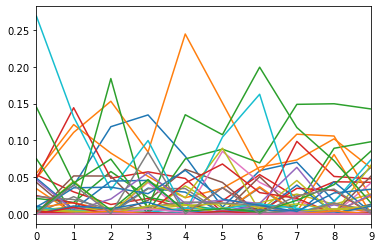

In [43]:
df.plot(legend=False)

Another way that makes the variation clearer is to plot how much each of the feature importances varies using a boxplot:

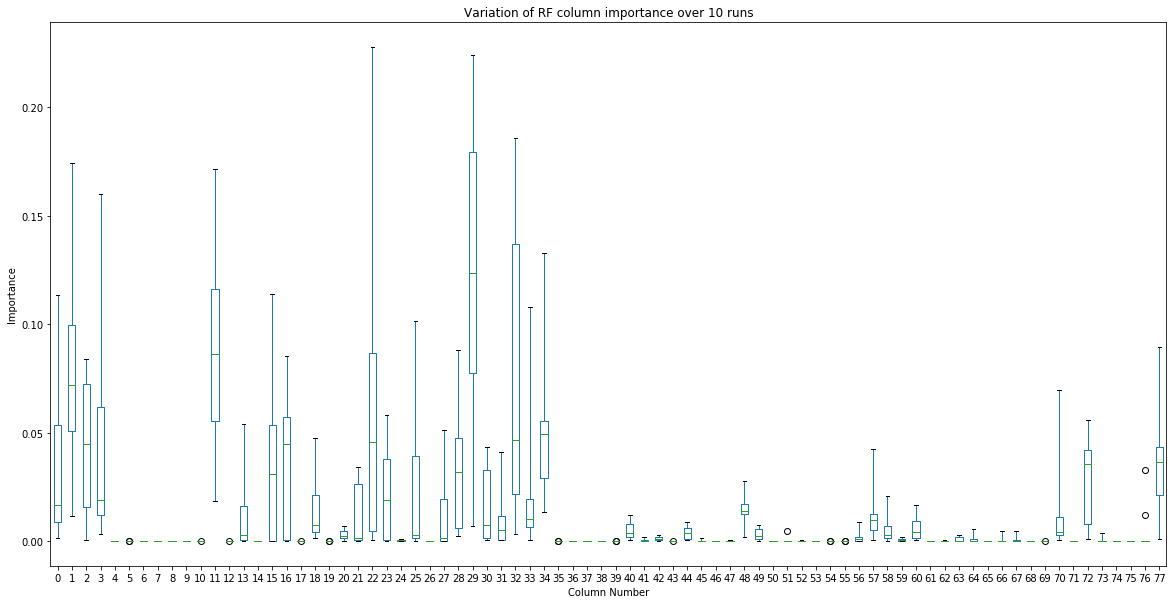

In [8]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Variation of RF column importance over 10 runs")
ax.set_xlabel("Column Number")
ax.set_ylabel("Importance")
df.boxplot(grid=False, whis=1000., ax=ax)

Clearly some features have very little importance but for the remainder the relative importance varies hugely from run to run due to the random nature of Random Forests.

# Using xgboost to get the feature importance

In [13]:
%%time
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X1_sigma, Y)

In [35]:
xg_importance = xgb.feature_importances_
xg_importance

array([4.7329403e-03, 0.0000000e+00, 8.9810267e-03, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.1276930e-02,
       0.0000000e+00, 1.7434136e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.0411058e-03, 0.0000000e+00,
       2.4640295e-03, 0.0000000e+00, 6.2512726e-01, 0.0000000e+00,
       0.0000000e+00, 5.1427062e-04, 0.0000000e+00, 0.0000000e+00,
       7.4304739e-04, 2.0335531e-01, 4.0172166e-04, 4.7231920e-04,
       1.4258807e-03, 0.0000000e+00, 2.3888556e-02, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.9602317e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.5265194e-02, 1.6785092e-03, 0.0000000e+00, 0.0000000e+00,
       1.0695638e-03, 2.6311394e-04, 0.0000000e+00, 0.0000000e+00,
       2.8898872e-03, 7.1290687e-02, 0.0000000e+00, 0.0000000e

Notes:  xgboost normalises the importance values so that they sum up to 1.  Also most of the features have an importance of zero and are completely rejected by XGB.

In [36]:
xg_ranked = sorted((rating, idx) for (idx, rating) in enumerate(importance))
# look at the 20 most important features
xg_ranked[-20:]

[(0.0004723192, 31),
 (0.0005142706, 25),
 (0.0007430474, 28),
 (0.0010695638, 52),
 (0.0014258807, 32),
 (0.0016785092, 49),
 (0.0017434136, 13),
 (0.0019602317, 44),
 (0.0024640295, 20),
 (0.0028898872, 56),
 (0.0030411058, 18),
 (0.0047329403, 0),
 (0.0074149747, 72),
 (0.008981027, 2),
 (0.015265194, 48),
 (0.02127693, 11),
 (0.023888556, 34),
 (0.07129069, 57),
 (0.20335531, 29),
 (0.62512726, 22)]

In [37]:
np.array([x[0] for x in reversed(xg_ranked)]).cumsum()

array([0.62512726, 0.82848257, 0.89977324, 0.92366177, 0.9449387 ,
       0.9602039 , 0.96918494, 0.97659993, 0.9813329 , 0.984374  ,
       0.98726386, 0.9897279 , 0.99168813, 0.99343157, 0.9951101 ,
       0.99653596, 0.9976055 , 0.99834853, 0.9988628 , 0.9993351 ,
       0.99973685, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999

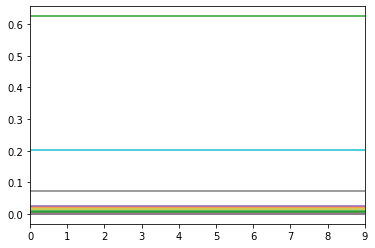

In [15]:
importances = []
for _ in range(10):
    xgb = XGBClassifier()
    xgb.fit(X1_sigma, Y)
    importances.append(xgb.feature_importances_)
df = pd.DataFrame(importances)
df.plot(legend=False)

Clearly XGBoost is much more consistent and opinionated.

# Feature Importance with Catboost

In [16]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()

In [18]:
%%time 
cb.fit(X1_sigma, Y, verbose=100)

Learning rate set to 0.061156
0:	learn: 0.5237915	total: 30.2ms	remaining: 30.2s
100:	learn: 0.0003742	total: 2.6s	remaining: 23.1s
200:	learn: 0.0002458	total: 4.95s	remaining: 19.7s
300:	learn: 0.0002417	total: 7.21s	remaining: 16.7s
400:	learn: 0.0002413	total: 9.33s	remaining: 13.9s
500:	learn: 0.0002413	total: 11.4s	remaining: 11.4s
600:	learn: 0.0002413	total: 13.5s	remaining: 8.96s
700:	learn: 0.0002413	total: 15.6s	remaining: 6.65s
800:	learn: 0.0002413	total: 17.7s	remaining: 4.39s
900:	learn: 0.0002413	total: 19.8s	remaining: 2.17s
999:	learn: 0.0002413	total: 21.8s	remaining: 0us
CPU times: user 2min 45s, sys: 6.44 s, total: 2min 51s
Wall time: 23.1 s


In [53]:
cb_importance = cb.get_feature_importance()
cb_importance

array([1.18430010e+00, 1.14742527e+00, 3.39528732e+00, 4.21509614e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.07372845e+01,
       0.00000000e+00, 4.99256200e-02, 0.00000000e+00, 2.80171153e-02,
       1.50692376e-02, 0.00000000e+00, 2.66639475e+00, 0.00000000e+00,
       4.67656710e-01, 0.00000000e+00, 2.21440580e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.43731181e-05, 0.00000000e+00,
       3.10907694e-02, 1.00211719e+01, 8.59017031e-01, 4.30230428e-01,
       1.76564068e+00, 1.76390195e+00, 5.38597299e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.68228173e-02, 1.73180901e-01, 0.00000000e+00,
       3.41893686e-02, 0.00000000e+00, 0.00000000e+00, 1.05503739e-04,
       2.69208110e+00, 2.57220819e-01, 1.33463605e-02, 0.00000000e+00,
       3.46336534e-02, 8.35212037e-02, 0.00000000e+00, 0.00000000e+00,
      

In [54]:
cb_ranked = sorted((rating, idx) for (idx, rating) in enumerate(cb_importance))
# look at the 20 most important features
cb_ranked[-20:]

[(0.20107563990257385, 77),
 (0.2572208193324662, 49),
 (0.4302304280925102, 31),
 (0.46765671017600735, 20),
 (0.5089034308958107, 70),
 (0.8590170314474369, 30),
 (1.1474252661338882, 1),
 (1.184300100425819, 0),
 (1.763901945568504, 33),
 (1.7656406752657117, 32),
 (1.77428342770122, 72),
 (2.6663947507615036, 18),
 (2.6920810952842076, 48),
 (3.3952873186498995, 2),
 (4.2150961419053825, 3),
 (5.385972985838783, 34),
 (7.830418729096104, 57),
 (10.021171940679691, 29),
 (22.14405802336696, 22),
 (30.7372845201552, 11)]

N.B. The feature importances from CatBoost are weighted to sum to 100 instead of 1.

Learning rate set to 0.061156
0:	learn: 0.5237915	total: 32.6ms	remaining: 32.6s
500:	learn: 0.0002413	total: 11.4s	remaining: 11.3s
999:	learn: 0.0002413	total: 21.8s	remaining: 0us
Learning rate set to 0.061156
0:	learn: 0.5237915	total: 32.3ms	remaining: 32.3s
500:	learn: 0.0002413	total: 11.3s	remaining: 11.3s
999:	learn: 0.0002413	total: 21.6s	remaining: 0us
Learning rate set to 0.061156
0:	learn: 0.5237915	total: 34.5ms	remaining: 34.4s
500:	learn: 0.0002413	total: 11.5s	remaining: 11.5s
999:	learn: 0.0002413	total: 22s	remaining: 0us
Learning rate set to 0.061156
0:	learn: 0.5237915	total: 35.7ms	remaining: 35.6s
500:	learn: 0.0002413	total: 15.1s	remaining: 15s
999:	learn: 0.0002413	total: 25.8s	remaining: 0us
Learning rate set to 0.061156
0:	learn: 0.5237915	total: 32.2ms	remaining: 32.1s
500:	learn: 0.0002413	total: 12s	remaining: 11.9s
999:	learn: 0.0002413	total: 23.2s	remaining: 0us
Learning rate set to 0.061156
0:	learn: 0.5237915	total: 37.7ms	remaining: 37.7s
500:	learn

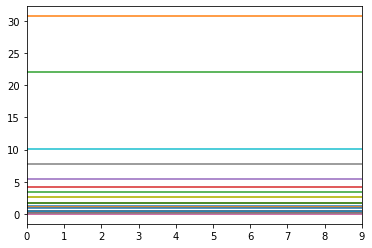

In [23]:
importances = []
for _ in range(10):
    cb = CatBoostClassifier()
    cb.fit(X1_sigma, Y, verbose=500)
    importances.append(cb.get_feature_importance())
df = pd.DataFrame(importances)
df.plot(legend=False)

As we can see, CatBoost is as consistent as XGBoost, although it gives somewhat different weights to the features.

In [40]:
np.array([x[0] for x in reversed(cb_ranked)]).cumsum()

array([0.62512726, 0.82848257, 0.89977324, 0.92366177, 0.9449387 ,
       0.9602039 , 0.96918494, 0.97659993, 0.9813329 , 0.984374  ,
       0.98726386, 0.9897279 , 0.99168813, 0.99343157, 0.9951101 ,
       0.99653596, 0.9976055 , 0.99834853, 0.9988628 , 0.9993351 ,
       0.99973685, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999

In [55]:
def top20(ranked):
    return [x[1] for x in ranked[-20:]]

print("RF:", top20(rf_ranked))
print("xgboost:", top20(xg_ranked))
print("catboost:", top20(cb_ranked))

print("Intersection:", set(top20(rf_ranked)).intersection(top20(xg_ranked)).intersection(top20(cb_ranked)))

RF: [57, 63, 18, 2, 24, 77, 33, 34, 70, 3, 16, 23, 13, 25, 32, 1, 11, 29, 22, 0]
xgboost: [31, 25, 28, 52, 32, 49, 13, 44, 20, 56, 18, 0, 72, 2, 48, 11, 34, 57, 29, 22]
catboost: [77, 49, 31, 20, 70, 30, 1, 0, 33, 32, 72, 18, 48, 2, 3, 34, 57, 29, 22, 11]
Intersection: {0, 32, 2, 34, 11, 18, 22, 57, 29}


In [57]:
selected_features = set(top20(xg_ranked)).intersection(top20(cb_ranked))
print("XGBoost and CatBoost Intersection:", selected_features)

XGBoost and CatBoost Intersection: {0, 32, 2, 34, 72, 11, 48, 49, 18, 20, 22, 57, 29, 31}


## Since the Random Forest feature importance rating is so unstable, for the next section we will use the features that both CatBoost and XGBoost both consider important

# Evaluating the models on the subset of features

In [18]:
from sklearn.model_selection import cross_validate

X_top_features = X1_sigma.iloc[:, list(selected_features)]

# shuffle the rows
from numpy import random, arange
indexes =  arange(Y.shape[0])
numpy.random.shuffle(indexes)
X_cv = X_top_features.iloc[indexes,:]
Y_cv = Y.iloc[indexes]


In [21]:
rf = RandomForestClassifier()
rf_cv = cross_validate(rf, X_cv, Y_cv, cv=5, scoring="accuracy")
rf_cv

/home/dave/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dave/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dave/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dave/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dave/anaconda3/lib/python3.7/site-packages/skl

{'fit_time': array([0.46078181, 0.41081405, 0.42314792, 0.42004848, 0.42713404]),
 'score_time': array([0.01698518, 0.01703095, 0.01725793, 0.01659465, 0.01717067]),
 'test_score': array([0.99989696, 0.99994848, 0.99963932, 0.99994847, 0.9997939 ])}

In [22]:
gb = XGBClassifier(verbosity=0)
gb_cv = cross_validate(gb, X_cv, Y_cv, cv=5, scoring="accuracy")
gb_cv

{'fit_time': array([4.75142622, 4.72674131, 4.71258163, 4.68719816, 4.67803741]),
 'score_time': array([0.06090856, 0.0629797 , 0.06166697, 0.06219172, 0.06117797]),
 'test_score': array([0.99984544, 0.99989696, 0.9997939 , 1.        , 0.99989695])}

In [23]:
cb = CatBoostClassifier(verbose=False, early_stopping_rounds=50)
cb_cv = cross_validate(cb, X_cv, Y_cv, cv=5, scoring="accuracy")
cb_cv

{'fit_time': array([18.94923472, 18.61247683, 19.04682803, 19.1216433 , 20.23271918]),
 'score_time': array([0.01401782, 0.01227093, 0.01484036, 0.01412797, 0.01279759]),
 'test_score': array([1.        , 1.        , 0.99989695, 1.        , 0.99994847])}

# Conclusion

We have reduced the feature set from 78 down to 14 by selecting those features that both XGBoost and CatBoost ranked as the most important.
In 5-fold cross validation tests Random Forest, XGBoost and CatBoost all scored more than 99.9% accuracy, with CatBoost scoring highest, including getting 100% on three of the five folds.  However CatBoost was the slowest to train (~19s compared with ~4.5s for both RF and XGB).  On the other hand it was the fastest for prediction.